In [1]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt 

<h3>#9.1

In [2]:
def poisson_simulation(_lambda, num_events, plot=True):
    event_num = np.arange(num_events)
    inter_event_times = stats.expon.rvs(loc=0, scale=1/_lambda, size=num_events)
    event_times = np.cumsum(inter_event_times)
    
    '''
    trajectories of a poisson process 
    '''
    if plot:
        fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
        ax[0].set_title('Times between events in a poisson process')
        ax[0].plot(event_num, inter_event_times, 'bo-')
        ax[0].set_xlabel('Index of event')
        ax[0].set_ylabel('Time')

        ax[1].set_title('Absolute times of events in a poisson process')
        ax[1].plot(event_num, event_times, 'bo-')
        ax[1].set_xlabel('Index of event')
        ax[1].set_ylabel('Time')

        plt.show()
    
    '''
    lambda estimation
    '''
    
    interval_nums = list()
    num_events_in_interval = list()
    interval_num = 1
    num_events_ = 0
    
    for event_time in event_times:
        if event_time <= interval_num:
            num_events_ += 1
        else:
            interval_nums.append(interval_num)
            num_events_in_interval.append(num_events_)
            
            interval_num += 1
            num_events_ = 1
            
    print('lambda estimation: {}'.format(np.mean(num_events_in_interval)))
    
    return event_times

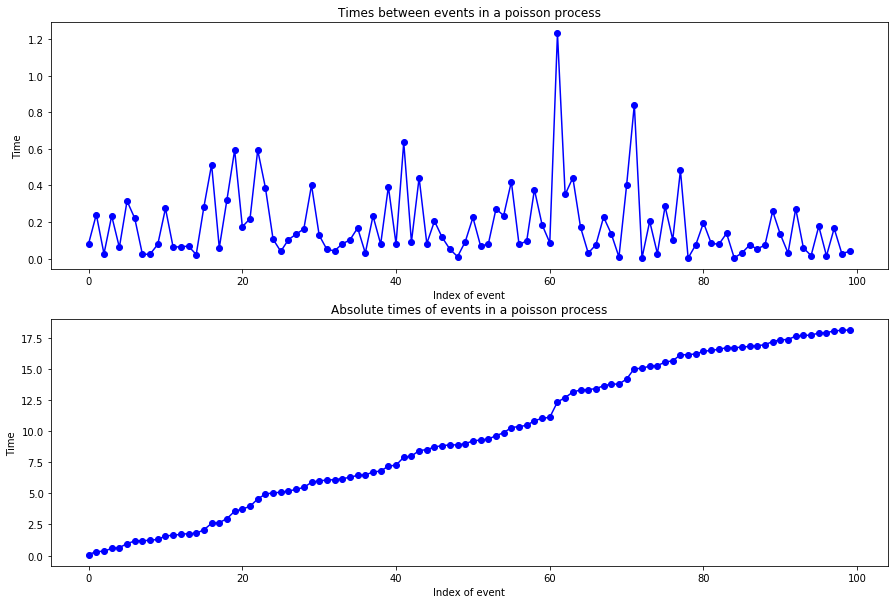

lambda estimation: 5.388888888888889


In [3]:
simulation = poisson_simulation(5, 100)

<h3>#9.2

In [8]:
def come(_lambda, num_events, ite):
    bus_times = poisson_simulation(_lambda, num_events, False)
    
    waiting_times = list()
    last_bus_times = list()
    for i in range(ite):
        come_to_stop = stats.uniform.rvs(loc=0, scale=bus_times[-1], size=1)
        waiting_times.append(bus_times[np.searchsorted(bus_times, come_to_stop[0])] - come_to_stop[0])
        if come_to_stop[0] > bus_times[0]:
            last_bus_times.append(come_to_stop[0] - bus_times[np.searchsorted(bus_times, come_to_stop[0])-1])
        else: last_bus_times.append(0)
        
    print('Waiting times mean: {}'.format(np.mean(waiting_times)))
    print('Last bus times mean: {}'.format(np.mean(last_bus_times)))
    plt.hist(waiting_times, bins=5)
    plt.show()

lambda estimation: 4.363636363636363
Waiting times mean: 0.22174838327450527
Last bus times mean: 0.22824012754707104


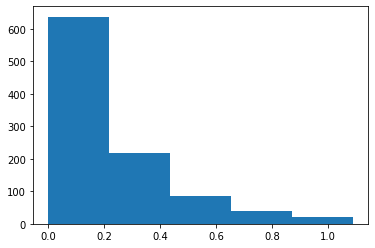

In [9]:
come(5, 100, 1000)